In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-ishutenko/statistics/london.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [57]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [58]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [59]:
df.timestamp = df.timestamp.sort_values()

In [60]:
df = df.set_index('timestamp')


In [62]:
df.resample(rule='D').agg({'cnt':'sum'})

,cnt
timestamp,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601
...,...
2016-12-30,11566
2016-12-31,11424
2017-01-01,6421


In [63]:
df.resample(rule='D').agg({'cnt':'sum'}).rolling(window=3).mean().reset_index().query("timestamp==2015")

,timestamp,cnt


In [37]:
c=df.resample(rule='D').agg({'cnt':'sum'}).reset_index() - df.resample(rule='D').agg({'cnt':'sum'}).rolling(window=3).mean().reset_index()
std=np.std(c)

In [67]:
c

,timestamp,cnt
0,0 days,NaN
1,0 days,NaN
2,0 days,3873.333333
3,0 days,381.000000
4,0 days,-3491.666667
...,...,...
726,0 days,-1116.000000
727,0 days,-923.333333
728,0 days,-3382.666667
729,0 days,1933.666667


In [68]:
df['upper_bound'] = (df.resample(rule='D').agg({'cnt':'sum'}).reset_index() - df.resample(rule='D').agg({'cnt':'sum'}).rolling(window=1).mean().reset_index()).cnt + 2.576*std.cnt

In [54]:
df.resample(rule='D').agg({'cnt':'sum'}).rolling(window=1).mean().reset_index().cnt

0       9234.0
1      20372.0
2      20613.0
3      21064.0
4      15601.0
        ...   
726    11566.0
727    11424.0
728     6421.0
729    11823.0
730    19436.0
Name: cnt, Length: 731, dtype: float64

In [15]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [72]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)

In [17]:
df = pd.read_csv('london.csv', parse_dates=['timestamp'])

In [25]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [34]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


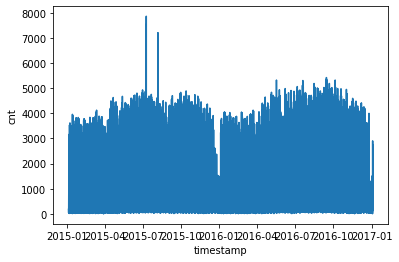

In [28]:
sns.lineplot(data=df, x='timestamp', y='cnt')

In [35]:
df = df.set_index('timestamp')

In [42]:
df_for_day = df.resample(rule='D').agg({'cnt' : 'sum'})

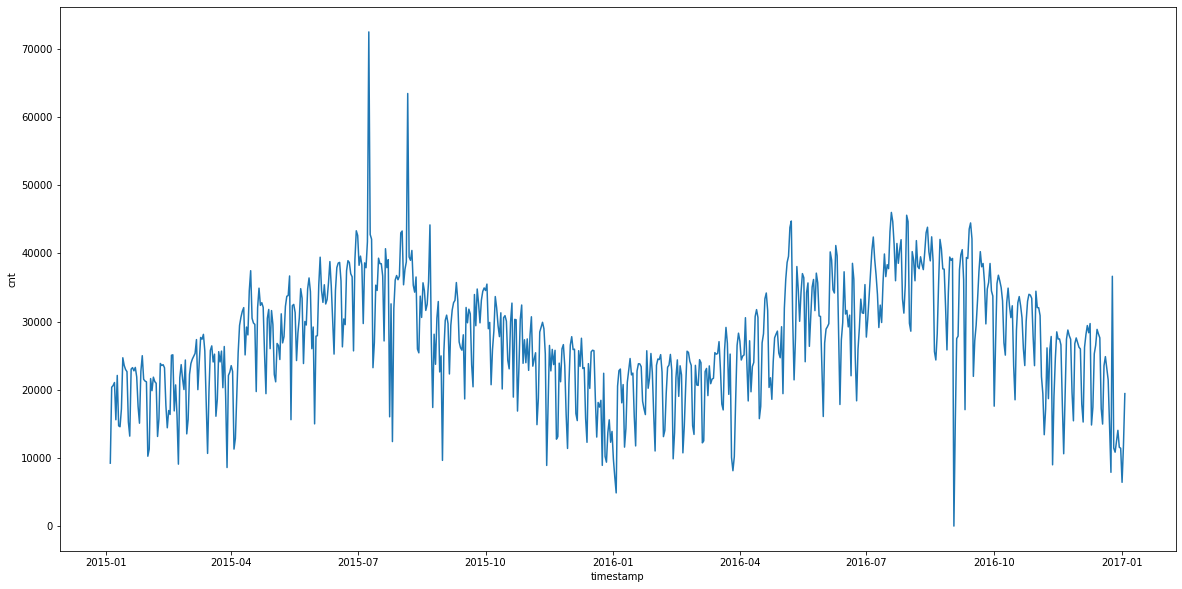

In [66]:
sns.lineplot(data=df_for_day, x='timestamp', y='cnt')

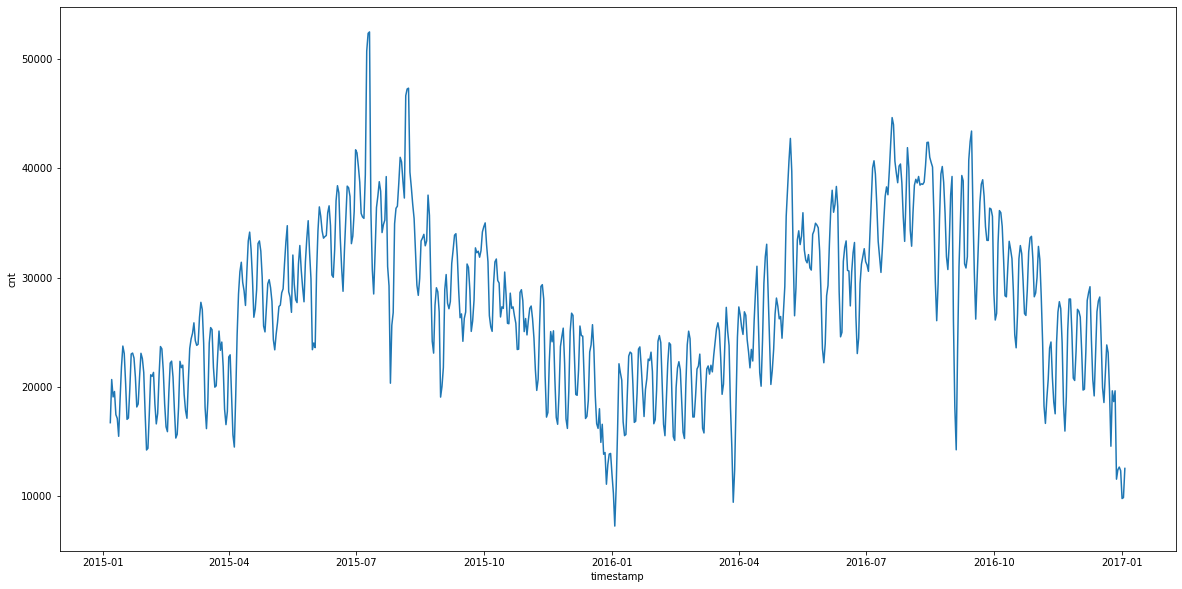

In [67]:
sns.lineplot(data=df_for_day.rolling(3).mean(), x='timestamp', y='cnt')

In [ ]:
2015-07-09

In [69]:
df_for_day.rolling(3).mean().query('timestamp == "2015-07-09"')

,cnt
timestamp,
2015-07-09,50705.0


In [91]:
std = np.std(df_for_day - df_for_day.rolling(3).mean()).cnt

In [92]:
std

4558.58664111794

In [77]:
df_for_day_with_rolling = df_for_day.rolling(3).mean()

In [80]:
df_for_day_with_rolling

,cnt
timestamp,
2015-01-04,NaN
2015-01-05,NaN
2015-01-06,16739.666667
2015-01-07,20683.000000
2015-01-08,19092.666667
...,...
2016-12-30,12682.000000
2016-12-31,12347.333333
2017-01-01,9803.666667


In [102]:
df_for_day['upper_bound'] = df_for_day_with_rolling.cnt + std*2.576

In [103]:
df_for_day['lower_bound'] = df_for_day_with_rolling.cnt - std*2.576

In [100]:
round(df_for_day_with_rolling.tail(1).upper_bound, 2)

timestamp
2017-01-03    24302.92
Freq: D, Name: upper_bound, dtype: float64

In [108]:
df_for_day.query('cnt > upper_bound')

,cnt,upper_bound,lower_bound
timestamp,,,
2015-07-09,72504,62447.919188,38962.080812
2015-08-06,63468,58370.252521,34884.414146
2016-09-04,27512,26001.919188,2516.080812
2016-12-25,36653,31393.585854,7907.747479


In [115]:
df.head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


In [117]:
df.reset_index().duplicated(subset='timestamp').sum()

0

In [119]:
df_for_day.query('cnt < lower_bound')

,cnt,upper_bound,lower_bound
timestamp,,,
2015-05-14,15609,40452.252521,16966.414146
2015-07-12,23240,47779.585854,24293.747479
2015-07-24,16034,42756.585854,19270.747479
2015-08-24,17400,41272.252521,17786.414146
2015-11-14,8898,32780.252521,9294.414146
2016-09-02,0,37829.252521,14343.414146
2016-09-10,17080,43004.919188,19519.080812
2016-09-16,21967,47936.252521,24450.414146
2016-11-12,8990,32620.919188,9135.080812
